In [47]:
filename = 'NSCI303_EEG_data_1.bin'
file = open(filename, "rb")

In [48]:
# read the first two 4-byte integers, print the values

value1 = int.from_bytes(file.read(4), "little")
value2 = int.from_bytes(file.read(4), "little")
print(value1, value2)

# initialize the loop
dataval = []

try:
    while True:
        # Read 2 bytes from the file
        byte_pair = file.read(2)
        # Specify endpoint
        if not byte_pair:  
            break
        # Convert the bytes to an integer and append to dataval
        dataval.append(int.from_bytes(byte_pair, "little", signed=True))
finally:
    # Close the loop
    file.close()

# End of Exercise 1

1843200 512


In [50]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.fft import rfft, rfftfreq

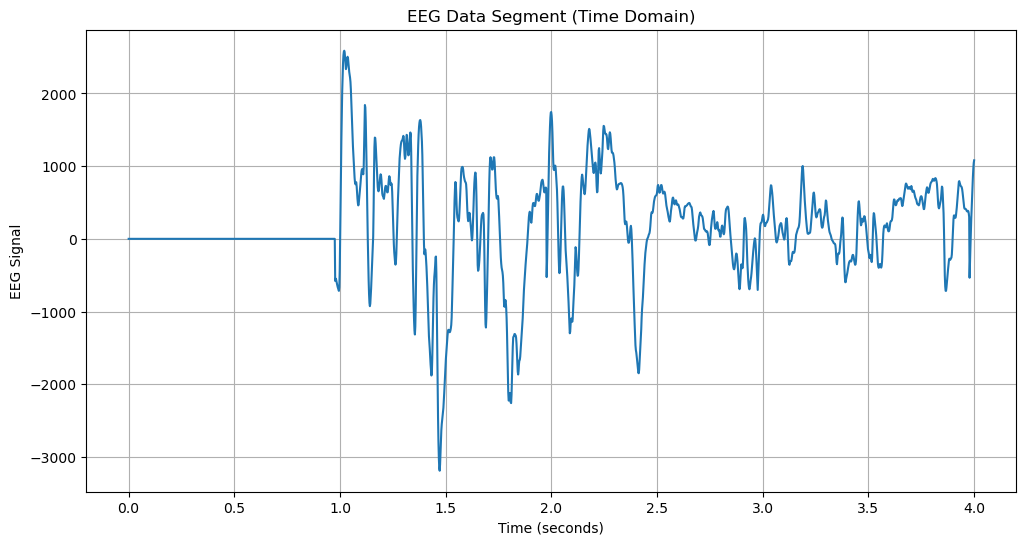

In [57]:
# Create x and y for time and EEG data, respectively.
# Select the first 2048 time points, which is the first 4 seconds of the EEG data.

sampling_rate = 512  # in Hz

# x array is:
time_array = np.linspace(0, 2048 / sampling_rate, 2048, endpoint=True)

# y array is:
eeg = dataval[:2048]

# Plot x vs. y:
plt.figure(figsize=(12, 6))
plt.plot(time_array, eeg)
plt.title('EEG Data Segment (Time Domain)')
plt.xlabel('Time (seconds)')
plt.ylabel('EEG Signal')
plt.grid(True)
plt.show()

# End of Exercise 2

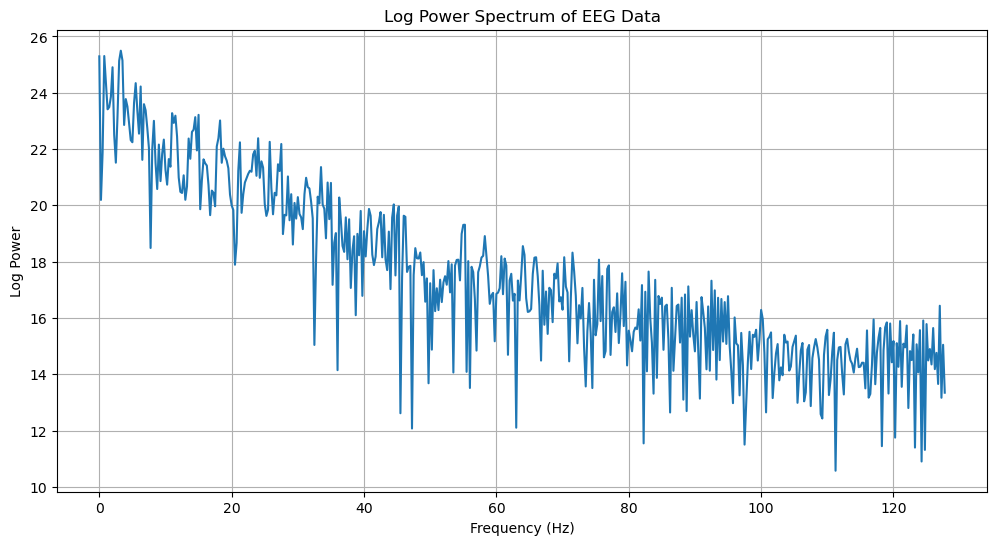

In [69]:
n = 2048  # Size of the transform
fftarray = dataval[:n]

fourier = np.fft.fft(fftarray)

pspec = np.abs(fourier)**2

# Find the first 1/4 the fftarray
quarter_size = n // 4
x_values = np.arange(quarter_size) * sampling_rate / n
y_values = pspec[:quarter_size]

y_values = np.where(y_values > 0, np.log(y_values), 0)

# Plotting the Power Spectrum
plt.figure(figsize=(12, 6))
plt.plot(x_values, y_values)
plt.title('Log Power Spectrum of EEG Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Log Power')
plt.grid(True)
plt.show()

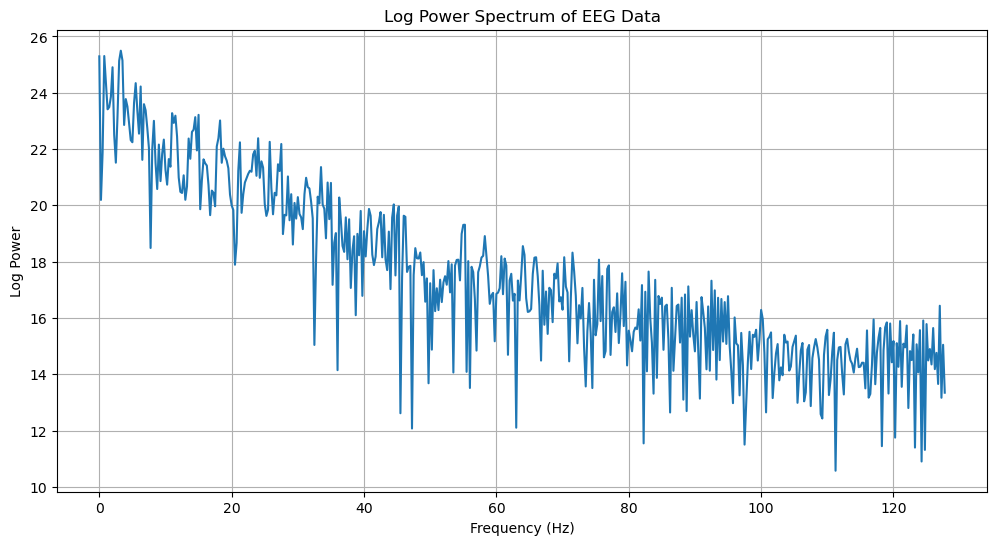

In [68]:

# Step 1: Choose the size of the transform and create an array for FFT
n = 2048  # Size of the transform
fftarray = dataval[:n]  # Copy the first n data values into the array for FFT

# Step 2: Perform the FFT and calculate the power spectrum
fourier = np.fft.fft(fftarray)
pspec = np.abs(fourier)**2

# Step 3: Use the first 1/4 of the size of the fftarray.
quarter_size = n // 4
x_values = np.arange(quarter_size) * sampling_rate / n
y_values = pspec[:quarter_size]

# Step 4: Convert power values to log scale for better visualization, avoiding log(0) by checking values
y_values = np.where(y_values > 0, np.log(y_values), 0)

# Plotting the Power Spectrum
plt.figure(figsize=(12, 6))
plt.plot(x_values, y_values)
plt.title('Log Power Spectrum of EEG Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Log Power')
plt.grid(True)
plt.show()

